In [6]:
import plotly_express as px
import pandas as pd
import streamlit as st


@st.cache
def load_data():
    """Utility function"""
    df = pd.read_csv("all_stocks_5yr.csv")
    numeric_df = df.select_dtypes(["float" , "int"])
    numeric_cols = numeric_df.columns
    
    text_df = df.select_dtypes(["object"])
    text_columns = text_df.columns
    
    stock_column = df["Name"]
    
    unique_stocks =stock_column.unique()
    return df, numeric_cols, text_columns, unique_stocks 
df, numeric_cols, text_columns, unique_stocks = load_data()

st.title("Stocks Dashboard")

# add a checkbox to sidebar
check_box = st.sidebar.checkbox(label = 'Display the Dataset')

print(check_box)

if check_box:
    st.write(df)

# title for side bar
st.sidebar.title("Setting")

# add a subheader
st.sidebar.subheader("Timeseries settings")

# multiselect
feature_selection = st.sidebar.multiselect(label = "Features to plot", 
                                           options = numeric_cols)

# add a select box for
stock_ticker = st.sidebar.selectbox(label = "Stock Ticker", options = unique_stocks)
print(feature_selection)
print(stock_ticker)

# index the dataframe based on the selected stock ticker
stock_df = df[df["Name"]== stock_ticker]

# plotly express line chart
plotly_figure = px.line(
        data_frame = stock_df,
         x = stock_df.index,
          y = feature_selection,
    title = "Timeline of" + str(stock_ticker) + "prices."
)

# visualize the chart
st.plotly_chart(plotly_figure)


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_data at 0x000002638097F310>
```

Please see the `hash_funcs` [documentation]
(https://streamlit.io/docs/caching.html)
for more details.
            

## Ou
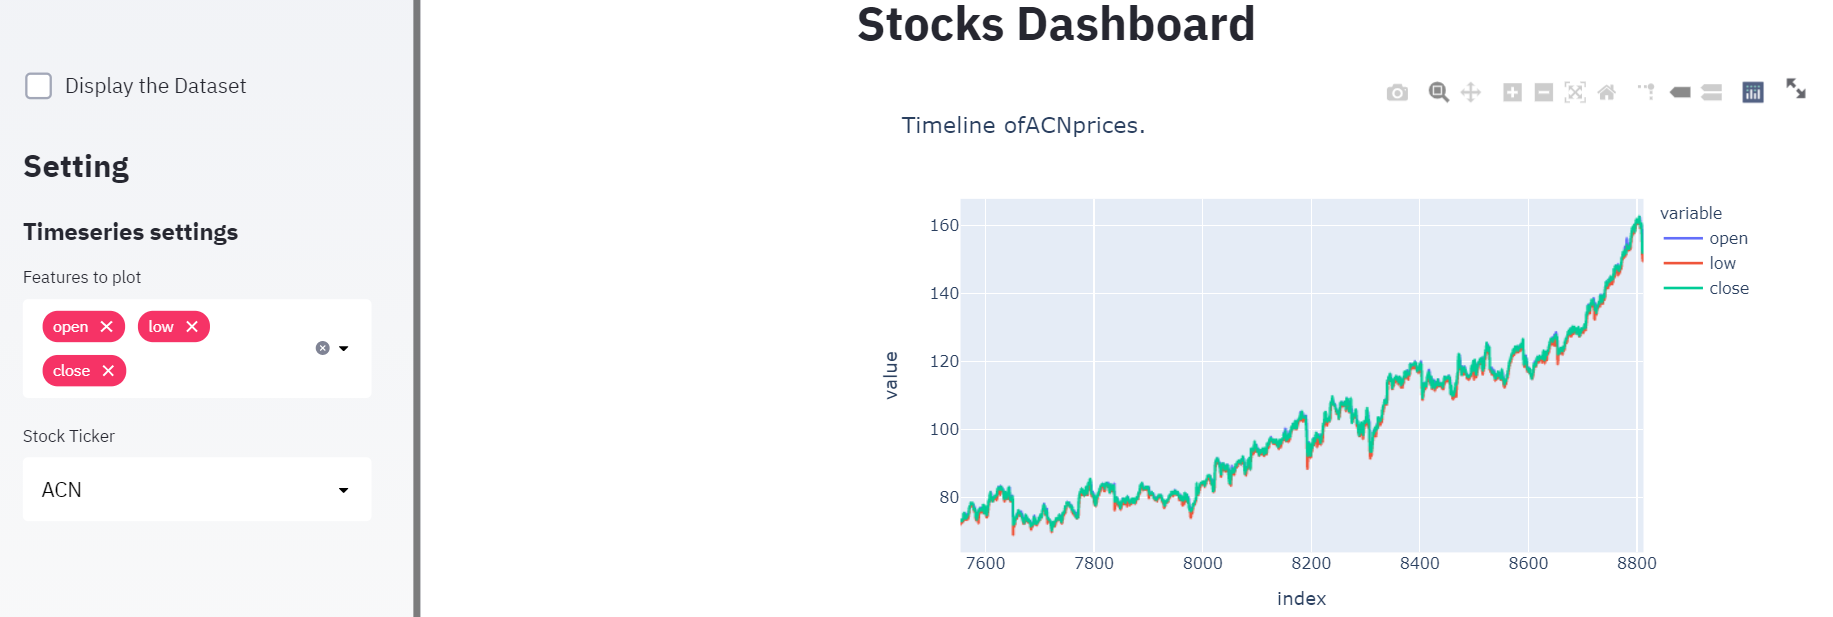